[http://qingkaikong.blogspot.com/2016/12/machine-learning-8-support-vector.html](http://qingkaikong.blogspot.com/2016/12/machine-learning-8-support-vector.html)


In [164]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from random import uniform
plt.style.use("default")
%matplotlib inline

In [165]:
# import the iris data
iris = datasets.load_iris()

# let's just use the first two features, so that we can
# easily visualize them
X = iris.data[:, [0, 2]]
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names
# get the classes
n_class = len(set(y))
print("We have %d classes in the data" % (n_class))


We have 3 classes in the data


In [166]:
blue = "RoyalBlue"
green = "MediumSeaGreen"
red = "FireBrick"


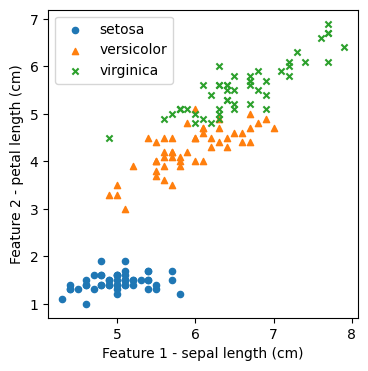

In [167]:
# let's have a look of the data first
plt.figure(figsize=(4, 4))
for i, s in zip(range(n_class), ["o", "^", "x"]):
    ix = y == i
    plt.scatter(X[:, 0][ix], X[:, 1][ix], marker=s, s=20, label=target_names[i])

plt.legend(loc=2, scatterpoints=1)
plt.xlabel("Feature 1 - " + feature_names[0])
plt.ylabel("Feature 2 - " + feature_names[2])
plt.show()


In [168]:
# Initialize SVM classifier


clf = svm.SVC(kernel="linear")

# Train the classifier with data
clf.fit(X, y)
SVC(
    C=1.0,
    cache_size=200,
    class_weight=None,
    coef0=0.0,
    decision_function_shape=None,
    degree=3,
    gamma="auto",
    kernel="linear",
    max_iter=-1,
    probability=False,
    random_state=None,
    shrinking=True,
    tol=0.001,
    verbose=False,
)


SVC(decision_function_shape=None, gamma='auto', kernel='linear')

In [169]:
def plot_confusion_matrix(
    cm,
    classes,
    title="Confusion matrix",
    cmap=plt.colormaps.get_cmap("BuPu"),
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig = plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    cmnormal = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        confusion = cm[i, j]
        normal_confusion = cmnormal[i, j]
        text = f"{confusion} ({normal_confusion*100:.0f}%)"
        plt.text(
            j,
            i,
            text,
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

        plt.ylabel("True label")
        plt.xlabel("Predicted label")
    fig.tight_layout(pad=3)
    plt.show()


# Plotting decision regions
def plot_desicion_boundary(
    X, y, clf, title=None, xlabel="Feature 1", ylabel="Feature 2"
):
    """
    Helper function to plot the decision boundary for the SVM
    """

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(4, 4))
    plt.contourf(xx, yy, Z, alpha=0.1)
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        edgecolor="black",
        linewidth=0.5,
        s=10,
        alpha=0.5,
    )

    if title is not None:
        plt.title(title)

    # highlight the support vectors
    # plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
    #            facecolors='none', zorder=10)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


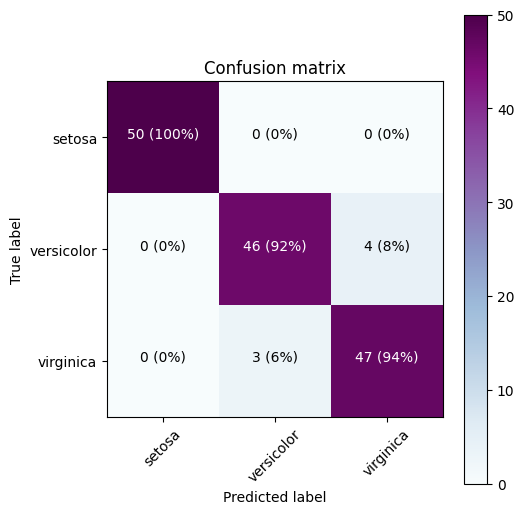

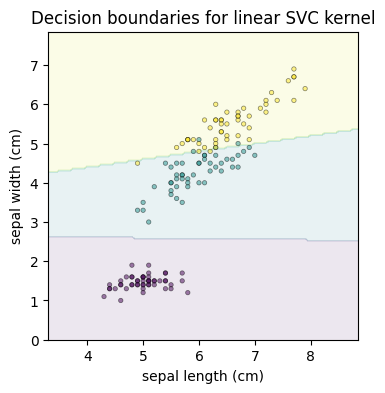

In [170]:
# predict results from the test data
predicted = clf.predict(X)

# plot the confusion matrix
plot_confusion_matrix(
    confusion_matrix(y, predicted),
    classes=iris.target_names,
    title="Confusion matrix",
)

plot_desicion_boundary(
    X,
    y,
    clf,
    title="Decision boundaries for linear SVC kernel",
    xlabel=feature_names[0],
    ylabel=feature_names[1],
)


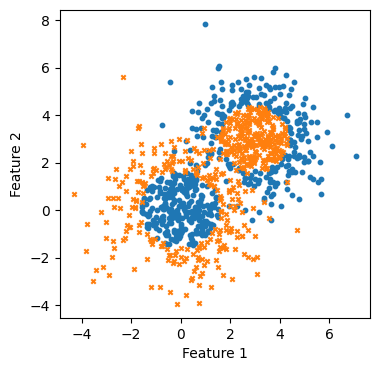

In [171]:
# let's construct a dataset that not linearly separatable
X1, y1 = datasets.make_gaussian_quantiles(
    cov=2.0, n_samples=500, n_features=2, n_classes=2, random_state=1
)
X2, y2 = datasets.make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=500, n_features=2, n_classes=2, random_state=1
)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))
n_class = 2
# let's have a look of the data first
plt.figure(figsize=(4, 4))
for i, s in zip(range(n_class), ["o", "x"]):
    ix = y == i
    plt.scatter(X[:, 0][ix], X[:, 1][ix], marker=s, s=10)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


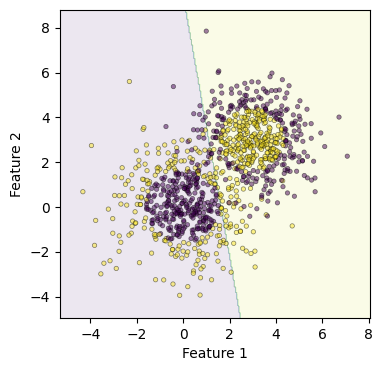

In [172]:
clf = svm.SVC(kernel="linear")
clf.fit(X, y)
SVC(
    C=1.0,
    cache_size=200,
    class_weight=None,
    coef0=0.0,
    decision_function_shape=None,
    degree=3,
    gamma="auto",
    kernel="linear",
    max_iter=-1,
    probability=False,
    random_state=None,
    shrinking=True,
    tol=0.001,
    verbose=False,
)
plot_desicion_boundary(X, y, clf)


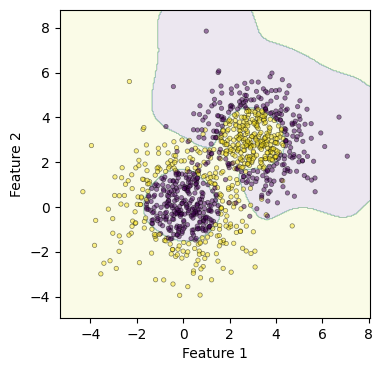

In [173]:
clf = SVC(
    C=2.0,
    cache_size=200,
    class_weight=None,
    coef0=0.0,
    degree=3,
    gamma=0.5,
    kernel="rbf",
    max_iter=-1,
    probability=False,
    random_state=None,
    shrinking=True,
    tol=0.001,
    verbose=False,
)
clf.fit(X, y)
plot_desicion_boundary(X, y, clf)


In [174]:
NUM_POINTS = 10
C_RANGE = (1, 100)
GAMMA_RANGE = (0, 1)


In [175]:
def grid_search():
    xvals, yvals = [], []
    plt.figure(figsize=(4, 4))
    plt.xlabel("Value of hyperparameter C")
    plt.ylabel("Value of hyperparameter γ")
    plt.title("Grid Selection")
    for x, y in itertools.product(
        np.arange(C_RANGE[0], C_RANGE[1], C_RANGE[1] / NUM_POINTS),
        np.arange(GAMMA_RANGE[0], GAMMA_RANGE[1], GAMMA_RANGE[1] / NUM_POINTS),
    ):
        xvals.append(x)
        yvals.append(y)
        plt.scatter(x, y, s=10, c="black")
    plt.show()
    return (xvals, yvals)


In [176]:
def random_search():
    xvals, yvals = [], []
    plt.figure(figsize=(4, 4))
    plt.xlabel("Value of hyperparameter C")
    plt.ylabel("Value of hyperparameter γ")
    plt.title("Random Selection")
    for _ in range(NUM_POINTS**2):
        x = (
            uniform(
                C_RANGE[0],
                C_RANGE[1],
            ),
        )
        y = (
            uniform(
                GAMMA_RANGE[0],
                GAMMA_RANGE[1],
            ),
        )
        xvals.append(x)
        yvals.append(y)
        plt.scatter(
            x,
            y,
            s=10,
            c="black",
        )
    plt.show()
    return (xvals, yvals)


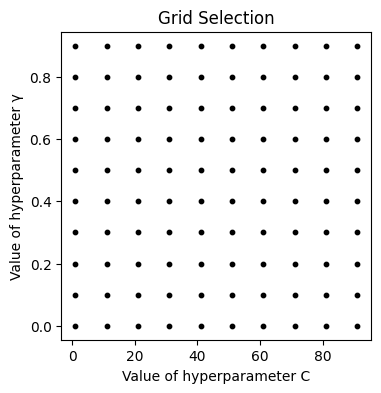

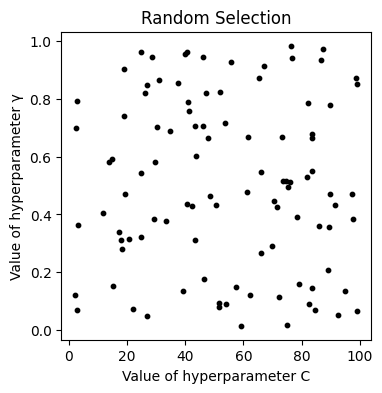

In [177]:
grid_search_x, grid_search_y = grid_search()
random_search_x, random_search_y = random_search()
